# Preparação dos dados

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import missingno as msno
import random
import math
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tam = 10000
x = np.linspace(-1,1,num = tam)
y_ = np.linspace(-1,1,num = tam)
label = np.linspace(-2,-1,num = tam)

In [ ]:
y = []
for i in range(tam):
  y.append(y_[random.randrange(tam)])

In [ ]:
df = pd.DataFrame()
df["x"] = x
df["y"] = y
df["label"] = label

In [ ]:
def distancia(xA,yA,xB,yB):
  calculo = ((xA-xB)**2) + ((yA-yB)**2)
  distAB = math.sqrt(calculo)
  return distAB

In [ ]:
distancia(df.x[2],df.y[1],0,-1)

1.1133481874246918

In [ ]:
for i in range(tam):
    dist1 = distancia(df.x[i],df.y[i],1,0)
    dist2 = distancia(df.x[i],df.y[i],0,-1)
    dist3 = distancia(df.x[i],df.y[i],-1,0)
    dist4 = distancia(df.x[i],df.y[i],0,1)
    if (dist1 <= 1 and dist2 <= 1):
      df.label[i] = 1
    elif (dist2 <= 1 and dist3 <= 1):
      df.label[i] = 1
    elif (dist3 <= 1 and dist4 <= 1):
      df.label[i] = 1
    elif (dist4 <= 1 and dist1 <= 1):
      df.label[i] = 1
    else:
      df.label[i] = 0

In [ ]:
df.label.value_counts()

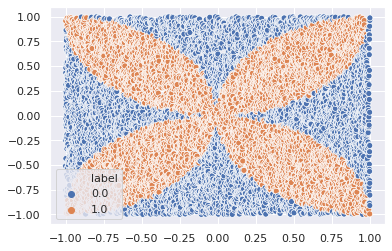

In [ ]:
sns.scatterplot(x,y, hue=df["label"])

In [ ]:
df.shape

(10000, 3)

In [ ]:
X = df[["x" , "y"]]
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25,
                                                    train_size=.75,
                                                    random_state=42)

In [ ]:
X_test

# letra A

In [ ]:
model_1 = keras.Sequential([
    keras.layers.Dense(8, activation=tf.nn.sigmoid),
])

In [ ]:
model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_1.fit(X_train, y_train, epochs=60) 

Epoch 1/60

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

235/235 [==============================] - 0s 1ms/step - loss: 1.9980 - accuracy: 0.1821
Epoch 2/60
235/235 [==============================] - 0s 1ms/step - loss: 1.8381 - accuracy: 0.5149
Epoch 3/60
235/235 [==============================] - 0s 1ms/step - loss: 1.6905 - accuracy: 0.6144
Epoch 4/60
235/235 [==============================] - 0s 1ms/step - loss: 1.5553 - accuracy: 0.5380
Epoch 5/60
235/235 [==============================] - 0s 1ms/step - loss: 1.4336 - accuracy: 0.5725
Epoch 6/

In [ ]:
test_loss, test_acc = model_1.evaluate(X_test,  y_test, verbose=2)

79/79 - 0s - loss: 0.6847 - accuracy: 0.5712


In [ ]:
predictions = model_1.predict(X_test)
predictions

array([[7.5833738e-01, 9.6208829e-01, 4.0575862e-04, ..., 4.1010976e-04,
        4.0826201e-04, 4.0557981e-04],
       [7.6109105e-01, 9.5745319e-01, 4.0227175e-04, ..., 4.0653348e-04,
        4.0480494e-04, 4.0206313e-04],
       [7.4110663e-01, 9.7004545e-01, 4.0778518e-04, ..., 4.1210651e-04,
        4.1025877e-04, 4.0754676e-04],
       ...,
       [7.6628065e-01, 9.5652092e-01, 4.0376186e-04, ..., 4.0802360e-04,
        4.0626526e-04, 4.0352345e-04],
       [7.5615287e-01, 9.6501434e-01, 4.0811300e-04, ..., 4.1243434e-04,
        4.1058660e-04, 4.0787458e-04],
       [7.3880398e-01, 9.6989065e-01, 4.0653348e-04, ..., 4.1088462e-04,
        4.0909648e-04, 4.0635467e-04]], dtype=float32)

In [ ]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))

In [ ]:
mat = tf.math.confusion_matrix(y_test, predictions_)
mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[   0, 1072],
       [   0, 1428]], dtype=int32)>

Text(89.18, 0.5, 'predicted label')

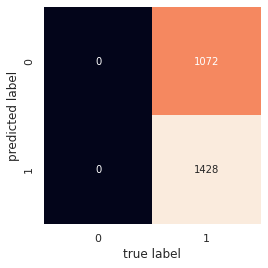

In [ ]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
x_certo = X_test[y_test == predictions_]
x_errado = X_test[y_test != predictions_]

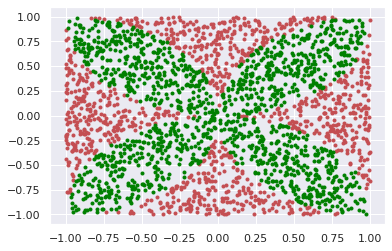

In [ ]:
plt.scatter(x_errado["x"],x_errado["y"], marker='.', color="r")
plt.scatter(x_certo["x"],x_certo["y"], marker='.', color="green")
plt.show()

# letra B

In [ ]:
model_2 = keras.Sequential([
    keras.layers.Dense(128, 
                       activation=tf.nn.relu, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(128, 
                       activation=tf.nn.relu, 
                       kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, 
                       activation=tf.nn.softmax)
])

In [ ]:
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_2.fit(X_train, y_train, epochs=60)

Epoch 1/60

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

235/235 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.7596
Epoch 2/60
235/235 [==============================] - 0s 2ms/step - loss: 0.3857 - accuracy: 0.8900
Epoch 3/60
235/235 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.9008
Epoch 4/60
235/235 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.9071
Epoch 5/60
235/235 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.9089
Epoch 6/

In [ ]:
test_loss, test_acc = model_2.evaluate(X_test,  y_test, verbose=2)

79/79 - 0s - loss: 0.1753 - accuracy: 0.9504


In [ ]:
predictions = model_2.predict(X_test)

In [ ]:
predictions_ = []
for i in range(len(predictions)):
  predictions_.append(np.argmax(predictions[i]))

In [ ]:
mat = tf.math.confusion_matrix(y_test, predictions_)
mat

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1005,   67],
       [  57, 1371]], dtype=int32)>

Text(89.18, 0.5, 'predicted label')

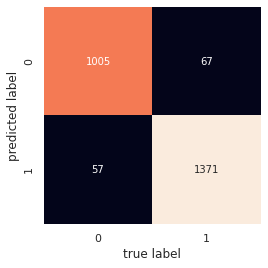

In [ ]:
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
x_certo = X_test[y_test == predictions_]
x_errado = X_test[y_test != predictions_]

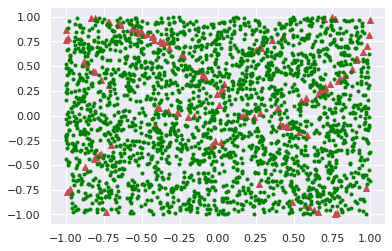

In [ ]:
plt.scatter(x_errado["x"],x_errado["y"], marker='^', color="r")
plt.scatter(x_certo["x"],x_certo["y"], marker='.', color="green")
plt.show()